In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from wordcloud import WordCloud,STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sharm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The CatBoostClassifier is a machine learning model from the CatBoost library, which is a gradient boosting algorithm designed for categorical features. It provides efficient and accurate models for classification tasks. CatBoost stands for Categorical Boosting, and it works well with categorical data without needing to manually encode them.

The WordCloud and STOPWORDS are components from the wordcloud library, which is used to generate word clouds (visual representations of text data). Word clouds allow you to visualize the frequency of words in a dataset or text, where more frequent words appear larger.

# Perform Exploratory Data Analysis (EDA) on financial sentiment analysis data.

In [4]:
df  = pd.read_csv(r"C:\Users\sharm\PycharmProjects\Machine Learning\Machine Learning\Financial Sentiment Analysis.csv")
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
df.shape

(5842, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [7]:
df.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


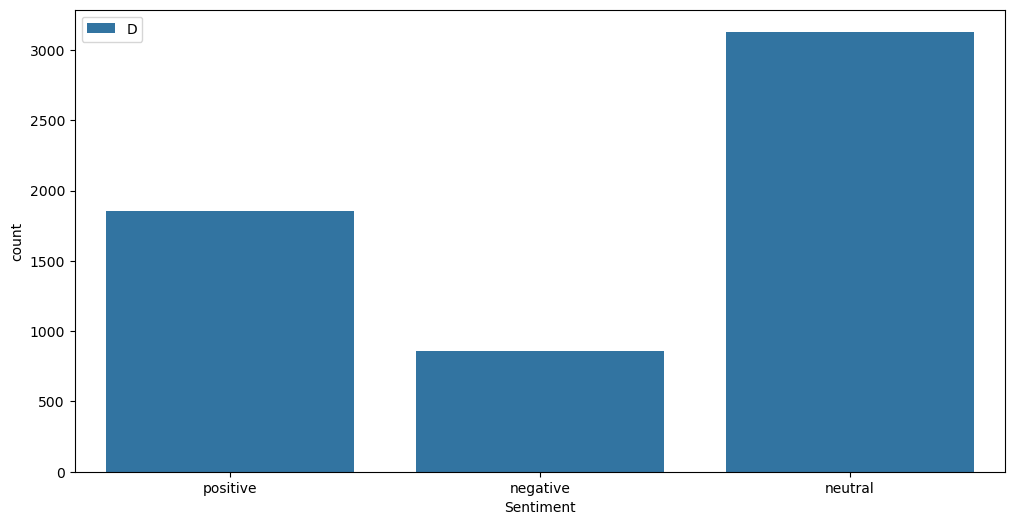

In [8]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Sentiment', data = df)
plt.legend('Distribution of Sentiment')
plt.show()

# Calculate the length of a tweet after removing stopwords.

In [10]:
def perform_eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on financial sentiment analysis data.
    
    Parameters:
    df (DataFrame): The dataframe containing the data.
    
    Returns:
    None
    """
    # Display the shape of the dataframe
    print('\nShape of the dataframe:', df.shape, '\n')

    # Print the head of the dataframe
    print("Head of the dataframe:")
    print(df.head())

    # Print general information about the dataframe
    print("\nInformation of the dataframe:")
    print(df.info())

    # Print summary statistics of the numerical columns of the dataframe
    print("\nSummary statistics of the numerical columns:")
    print(df.describe())

    # Print a countplot of Sentiment
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Sentiment', data=df)
    plt.title('Distribution of Sentiments')
    plt.show()
    


def tweet_len(tweet):
    """
    Calculate the length of a tweet after removing stopwords.

    Args:
    tweet (str): The input tweet.

    Returns:
    int: The length of the tweet after removing stopwords.
    """
    # Remove non-alphabetic characters
    letters_only = re.sub('[^a-zA-Z]', ' ', tweet)
    
    # Convert to lowercase and split into words
    words = letters_only.lower().split()
    
    # Get the set of English stopwords
    stops = set(stopwords.words('english'))
    
    # Filter out stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Return the length of meaningful words
    return len(meaningful_words)

def tweet_to_words(tweet):
    """
    Convert a tweet to a string of meaningful words (excluding stopwords).

    Args:
    tweet (str): The input tweet.

    Returns:
    str: A string containing meaningful words.
    """
    # Remove non-alphabetic characters
    letters_only = re.sub('[^a-zA-Z]', ' ', tweet)
    
    # Convert to lowercase and split into words
    words = letters_only.lower().split()
    
    # Get the set of English stopwords
    stops = set(stopwords.words('english'))
    
    # Filter out stopwords
    meaningful_words = [w for w in words if w not in stops]
    
    # Join the meaningful words back into a single string
    return ' '.join(meaningful_words)


Shape of the dataframe: (5842, 2) 

Head of the dataframe:
                                            Sentence Sentiment
0  The GeoSolutions technology will leverage Bene...  positive
1  $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2  For the last quarter of 2010 , Componenta 's n...  positive
3  According to the Finnish-Russian Chamber of Co...   neutral
4  The Swedish buyout firm has sold its remaining...   neutral

Information of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None

Summary statistics of the numerical columns:
                                                 Sentence Sentiment
count                                                5842      5842
unique                                   

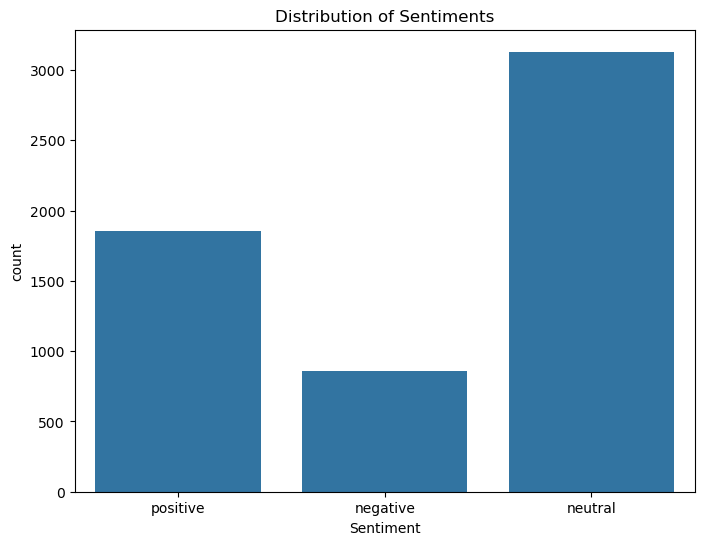

In [11]:
# Perform EDA
perform_eda(df)

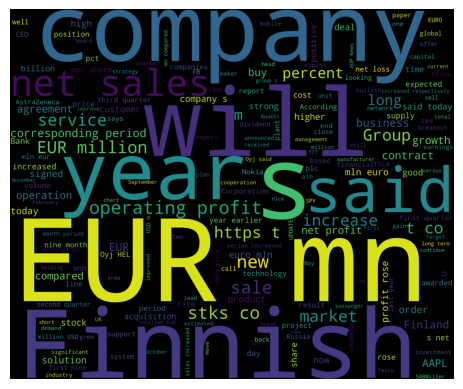

In [12]:
# Sentiment Positive
df1 = df[df['Sentiment']=='positive']
words = ' '.join(df1['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

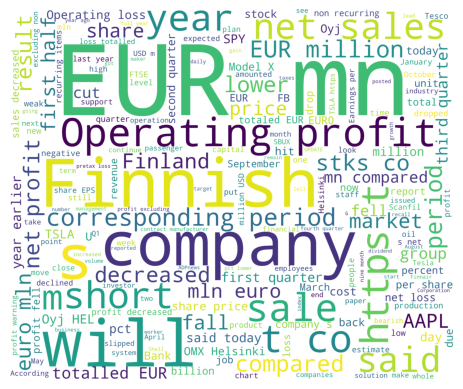

In [13]:
# Sentiment Negative

df2 = df[df['Sentiment']=='negative']
words = ' '.join(df2['Sentence'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='white',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [14]:
plot1 = df.groupby(by=["Sentence","Sentiment"]).count().reset_index()
plot1
                      

,Sentence,Sentiment
0,"#Apple breaks major support, here are some lev...",negative
1,#Apple up almost 20% from its February lows wi...,positive
2,#Fintech provider $CAFN Cachet Financial Solut...,positive
3,#FusionIQ NEW Positive Timing Signal on $SBUX ...,positive
4,#LongPos $TSLA 256 Break-out thru 50 & 200- DM...,positive
...,...,...
5831,volatility squeeze in $AAPL. I hope it gets re...,neutral
5832,what #stocks large players are selling http://...,negative
5833,what is up with $HK..... from Jan to now it's ...,negative
5834,www.countryelements.co.uk Designed by Patricia...,neutral


In [15]:
# Preprocessing steps:
# - 'Sentiments': Assigns 0 for 'negative' sentiment and 1 for other sentiments.
# - 'clean_tweet': Applies 'tweet_to_words' function to clean and process the tweet text.
# - 'tweet_length': Calculates the length of the cleaned tweet.

df['Sentiments'] = df['Sentiment'].apply(lambda x: 0 if x=='negative' else 1)
df['clean_tweet'] = df['Sentence'].astype(str).apply(lambda x: tweet_to_words(x))
df['tweet_length'] = df['Sentence'].apply(lambda x: tweet_len(x))

In [16]:
df

,Sentence,Sentiment,Sentiments,clean_tweet,tweet_length
0,The GeoSolutions technology will leverage Bene...,positive,1,geosolutions technology leverage benefon gps s...,21
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,0,esi lows bk real possibility,5
2,"For the last quarter of 2010 , Componenta 's n...",positive,1,last quarter componenta net sales doubled eur ...,20
3,According to the Finnish-Russian Chamber of Co...,neutral,1,according finnish russian chamber commerce maj...,11
4,The Swedish buyout firm has sold its remaining...,neutral,1,swedish buyout firm sold remaining percent sta...,14
...,...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,0,rising costs forced packaging producer huhtama...,11
5838,Nordic Walking was first used as a summer trai...,neutral,1,nordic walking first used summer training meth...,10
5839,"According shipping company Viking Line , the E...",neutral,1,according shipping company viking line eu deci...,10
5840,"In the building and home improvement trade , s...",neutral,1,building home improvement trade sales decrease...,8


In [17]:
train_data, test_data = train_test_split(df, test_size = 0.2, random_state = 123) 


In [18]:
train_data, test_data

(                                               Sentence Sentiment  Sentiments  \
 4151  Continuing operations turned an operating loss...  positive           1   
 4633  To showcase our end-to-end capabilities at the...   neutral           1   
 3632  The incident happened at 2:30 p.m. on Avenue 1...   neutral           1   
 3395  The long-standing partnership and commitment e...  positive           1   
 4917  The chain posted sales of 298 million euros fo...  positive           1   
 ...                                                 ...       ...         ...   
 5218  Ragutis , which is based in Lithuania 's secon...  positive           1   
 4060  However , two of the previously ordered sets w...   neutral           1   
 1346  Cencorp estimates that its net sales in the la...  positive           1   
 3454  Seppala transferred the sale to a greater exte...   neutral           1   
 3582  Orion 's net profit for the third quarter of 2...  negative           0   
 
              

In [19]:
# Extracting cleaned tweets for training and testing data:
# - train_clean_tweet: List containing cleaned tweets from the training data.
# - test_clean_tweet: List containing cleaned tweets from the testing data.

train_clean_tweet = []
for tweet in train_data['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet = []
for tweet in test_data['clean_tweet']:
    test_clean_tweet.append(tweet)

In [20]:
# Using CountVectorizer to convert text data into a matrix of token counts:

# Initialize CountVectorizer

v = CountVectorizer(analyzer= 'word')


# Convert  cleaned tweets into  Fetaures vectors

train_features = v.fit_transform(train_clean_tweet)     # Fit and transform on training data
test_features = v.transform(test_clean_tweet)           # Only transform on test data 


# Time to build our Models

In [22]:
# List of Classifiers with Different Algorithms:

Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
    CatBoostClassifier(verbose=False),
    SGDClassifier()
]

In [23]:
# Model Training and Evaluation

dense_features = train_features.toarray()
dense_test = test_features.toarray()

# Initialize lists to store model names and their respective accuracies
Accuracy = []
Model = []

# Iterate through each classifier
for classifier in Classifiers:
    try:
        # Try fitting the classifier with sparse features
        fit = classifier.fit(train_features, train_data['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        # If there's an exception, fit the classifier with dense features
        fit = classifier.fit(dense_features, train_data['Sentiment'])
        pred = fit.predict(dense_test)
    
    # Calculate accuracy and append to lists
    accuracy = accuracy_score(pred, test_data['Sentiment']) * 100
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of ' + classifier.__class__.__name__ + ' is ' + str(accuracy) + '%')

Accuracy of LogisticRegression is 52.3524379811805%
Accuracy of KNeighborsClassifier is 54.31993156544055%
Accuracy of DecisionTreeClassifier is 59.366980325064155%
Accuracy of RandomForestClassifier is 63.55859709153122%
Accuracy of AdaBoostClassifier is 65.61163387510693%
Accuracy of GaussianNB is 53.37895637296835%
Accuracy of CatBoostClassifier is 66.89478186484175%
Accuracy of SGDClassifier is 65.44054747647561%


In [24]:
# Create a Dataframe  to store model names and their respective accuracies

result = pd.DataFrame({'Models': Model})

# Add accuracy column

result['Accuracy'] = Accuracy

# sort the dataframe by accruaracy in descending Order

result = result.sort_values(by= 'Accuracy', ascending = False)

result

,Models,Accuracy
6,CatBoostClassifier,66.894782
4,AdaBoostClassifier,65.611634
7,SGDClassifier,65.440547
3,RandomForestClassifier,63.558597
2,DecisionTreeClassifier,59.366980
1,KNeighborsClassifier,54.319932
5,GaussianNB,53.378956
0,LogisticRegression,52.352438


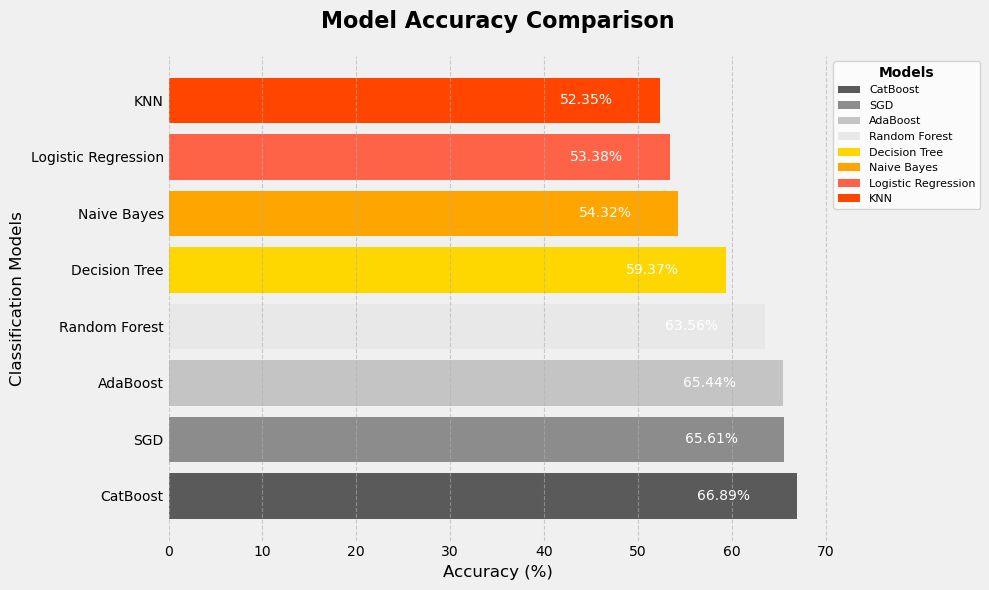

In [25]:
# Set a custom color palette
custom_palette = ['#5A5A5A', '#8C8C8C', '#C4C4C4', '#E8E8E8', '#FFD700', '#FFA500', '#FF6347', '#FF4500']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define the models and their corresponding accuracies
Models = ['CatBoost', 'SGD', 'AdaBoost', 'Random Forest',
          'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN']
Accuracy = result['Accuracy']

# Create a horizontal bar plot with custom colors
bars = ax.barh(Models, Accuracy, color=custom_palette)

# Add text labels for each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', va='center', ha='right', color='white', fontsize=10)

# Add a creative background
ax.set_facecolor('#F0F0F0')
fig.patch.set_facecolor('#F0F0F0')

# Set plot title, labels, and style
ax.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Accuracy (%)', fontsize=12)
ax.set_ylabel('Classification Models', fontsize=12)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Remove ticks
ax.tick_params(axis='both', which='both', length=0)

# Add grid lines
ax.grid(axis='x', linestyle='--', alpha=0.6)

# Manually create the legend
legend_labels = ['CatBoost', 'SGD', 'AdaBoost', 'Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'KNN']
legend_rects = [plt.Rectangle((0,0),1,1,fc=custom_palette[i], edgecolor = 'none') for i in range(len(legend_labels))]
legend = plt.legend(legend_rects, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title='Models', title_fontsize=10, fontsize=8)
plt.setp(legend.get_title(), fontweight='bold')

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight', transparent=True)

# Show the plot
plt.show()